In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe=pd.read_csv("Training Data 2017 2018(3).csv", header=0, names=['x','text','date','approval','label'])

In [3]:
dataframe.head()

,x,text,date,approval,label
0,0,numerous countries considered meeting would pe...,04/30/2018,41.31839,1
1,1,white house correspondents dinner dead know to...,04/30/2018,41.31839,1
2,2,headline kim prepared cede nuclear weapons u p...,04/30/2018,41.31839,1
3,3,white house correspondents dinner failure last...,04/30/2018,41.31839,1
4,4,trump triumphs driving critics crazy thank ste...,04/30/2018,41.31839,1


In [4]:
dataframe=dataframe.drop("x",axis=1)

In [5]:
dataframe.head()

,text,date,approval,label
0,numerous countries considered meeting would pe...,04/30/2018,41.31839,1
1,white house correspondents dinner dead know to...,04/30/2018,41.31839,1
2,headline kim prepared cede nuclear weapons u p...,04/30/2018,41.31839,1
3,white house correspondents dinner failure last...,04/30/2018,41.31839,1
4,trump triumphs driving critics crazy thank ste...,04/30/2018,41.31839,1


In [7]:
"""""from sklearn.utils import shuffle
dataframe_s = shuffle(dataframe)

KeyboardInterrupt: 

In [ ]:
dataframe.dtypes

In [6]:
max_value=max(dataframe['approval'])
min_value=min(dataframe['approval'])
one_third=(max_value-min_value)/3

In [7]:
def labeller(value):
    if value<=(min_value+one_third):
        return 0
    elif value>(min_value+one_third) and value<(max_value-one_third):
        return 1
    else:
        return 2

In [8]:
dataframe['new_label']=dataframe['approval'].apply(labeller)

In [9]:
print(dataframe.groupby(by='new_label').count())

           text  date  approval  label
new_label                             
0          1796  1820      1820   1820
1           791   799       799    799
2           217   217       217    217


In [ ]:
""""for idx, row in dataframe_s.iterrows():
    if  dataframe_s.loc[idx,'label'] == -2:
        dataframe_s.loc[idx,'new'] = 0
    elif  dataframe_s.loc[idx,'label'] == -1:
        dataframe_s.loc[idx,'new'] = 0
    elif  dataframe_s.loc[idx,'label'] == 0:
        dataframe_s.loc[idx,'new'] = 1
    elif  dataframe_s.loc[idx,'label'] == 1:
        dataframe_s.loc[idx,'new'] = 1
    elif  dataframe_s.loc[idx,'label'] == 2:
        dataframe_s.loc[idx,'new'] = 1

In [10]:
print(dataframe.head())

                                                text        date  approval  \
0  numerous countries considered meeting would pe...  04/30/2018  41.31839   
1  white house correspondents dinner dead know to...  04/30/2018  41.31839   
2  headline kim prepared cede nuclear weapons u p...  04/30/2018  41.31839   
3  white house correspondents dinner failure last...  04/30/2018  41.31839   
4  trump triumphs driving critics crazy thank ste...  04/30/2018  41.31839   

   label  new_label  
0      1          1  
1      1          1  
2      1          1  
3      1          1  
4      1          1  


In [10]:
dataframe_s=dataframe[['text','new_label']]

In [11]:
dataframe_s

,text,new_label
0,numerous countries considered meeting would pe...,1
1,white house correspondents dinner dead know to...,1
2,headline kim prepared cede nuclear weapons u p...,1
3,white house correspondents dinner failure last...,1
4,trump triumphs driving critics crazy thank ste...,1
5,got recent poll much higher president time wel...,1
6,washington michigan big success washington c w...,1
7,great evening last night washington michigan e...,1
8,join live washington michigan pme,1
9,secret service informed senator jon tester sta...,1


In [ ]:
#dataframe_s=dataframe_s.drop('label', axis=1)

In [ ]:
#dataframe_s=dataframe.drop(['Date','approval_date','label'], axis=1)

In [12]:
from sklearn.utils import shuffle
dataframe_s = shuffle(dataframe_s)

train=dataframe_s.iloc[:1700,:]
cross_eval=dataframe_s.iloc[1701:2401,:]
test=dataframe_s.iloc[2402:2835,:]

In [13]:
train

,text,new_label
2463,brother john podesta paid big money get sancti...,1
957,think three ucla basketball players say thank ...,0
357,march th democrats nowhere found daca gave mon...,1
1126,chris wallace evidence dem collusion russia gop,0
2809,chicago fix horrible carnage going shootings k...,1
537,tool anti trump political actors unacceptable ...,1
1452,rand paul whoever votes hcare bill forever fut...,0
2625,trump vows fight epidemic human trafficking,1
1836,great honor join wonderful veterans amvets pos...,0
1479,puerto rico hit hard new monster hurricane car...,0


In [ ]:
""""train_test=int(len(test))/int(len(dataframe))
print ("Train size : %d" % len(train))
print ("Test size : %d" % len(test))
print ("Train Test Split is at %s" % str(train_test))

In [14]:
train=train.dropna()

In [15]:
test=test.dropna()

In [ ]:
#train=train.drop(columns=['Date'])

In [ ]:
#train['label']=train['label']+2

In [ ]:
#test=test.dropna()
#test['label']=test['label']+2

In [16]:
import tensorflow as tf

In [17]:
#!pip install tensorflow_hub
import tensorflow_hub as hub

In [25]:
train_input_fn=tf.estimator.inputs.pandas_input_fn(train, train['new_label'],num_epochs=1000, shuffle=True)

In [26]:
eval_input_fn=tf.estimator.inputs.pandas_input_fn(cross_eval, cross_eval['new_label'],num_epochs=1000, shuffle=True)
predict_train_input_fn=tf.estimator.inputs.pandas_input_fn(train, train['new_label'],shuffle=False)

In [27]:
predict_test_input_fn=tf.estimator.inputs.pandas_input_fn(test,test['new_label'],shuffle=False)

In [28]:
run_config=tf.estimator.RunConfig(keep_checkpoint_max=1)


In [29]:
embedded_text_feature_column=hub.text_embedding_column(key='text',module_spec='https://tfhub.dev/google/nnlm-en-dim128/1',trainable=True)

In [30]:
estimator=tf.estimator.DNNClassifier(
    hidden_units=[200,50,50],
    feature_columns=[embedded_text_feature_column],
    n_classes=3,
    config=run_config,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.0005))

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpjh0lo8e8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EEB21B9400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
estimator.train(input_fn=train_input_fn,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt.
INFO:tensorflow:loss = 141.96779, step = 0
INFO:tensorflow:global_step/sec: 163.808
INFO:tensorflow:loss = 113.97865, step = 100 (0.612 sec)
INFO:tensorflow:global_step/sec: 179.691
INFO:tensorflow:loss = 114.92039, step = 200 (0.557 sec)
INFO:tensorflow:global_step/sec: 178.73
INFO:tensorflow:loss = 100.17296, step = 300 (0.560 sec)
INFO:tensorflow:global_step/sec: 182.636
INFO:tensorflow:loss = 108.48428, step = 400 (0.547 sec)
INFO:tensorflow:global_step/sec: 176.527
INFO:t

INFO:tensorflow:global_step/sec: 175.599
INFO:tensorflow:loss = 7.663768, step = 7900 (0.570 sec)
INFO:tensorflow:global_step/sec: 181.644
INFO:tensorflow:loss = 3.6590097, step = 8000 (0.550 sec)
INFO:tensorflow:global_step/sec: 178.095
INFO:tensorflow:loss = 4.5552373, step = 8100 (0.561 sec)
INFO:tensorflow:global_step/sec: 183.976
INFO:tensorflow:loss = 2.8820395, step = 8200 (0.544 sec)
INFO:tensorflow:global_step/sec: 183.304
INFO:tensorflow:loss = 5.296942, step = 8300 (0.546 sec)
INFO:tensorflow:global_step/sec: 184.315
INFO:tensorflow:loss = 2.497655, step = 8400 (0.543 sec)
INFO:tensorflow:global_step/sec: 182.637
INFO:tensorflow:loss = 2.4934955, step = 8500 (0.547 sec)
INFO:tensorflow:global_step/sec: 182.304
INFO:tensorflow:loss = 5.2063007, step = 8600 (0.550 sec)
INFO:tensorflow:global_step/sec: 185.681
INFO:tensorflow:loss = 3.491932, step = 8700 (0.539 sec)
INFO:tensorflow:global_step/sec: 180.337
INFO:tensorflow:loss = 3.8708735, step = 8800 (0.555 sec)
INFO:tensorflo

In [32]:
train_eval_result=estimator.evaluate(input_fn=predict_train_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-05-17:31:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-05-17:31:46
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.9964371, average_loss = 0.023203403, global_step = 10000, loss = 2.791038
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt-10000


In [33]:
print("Training Test Accuracy: {accuracy}".format(**train_eval_result))

Training Test Accuracy: 0.9964370727539062


In [34]:
test_eval_result=estimator.evaluate(input_fn=predict_test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-05-17:31:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-05-17:31:50
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.6117647, average_loss = 1.6061288, global_step = 10000, loss = 170.65118
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt-10000


In [35]:
print("Test Training Accuracy: {accuracy}".format(**test_eval_result))

Test Training Accuracy: 0.6117647290229797


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(33.0, 0.5, 'True')

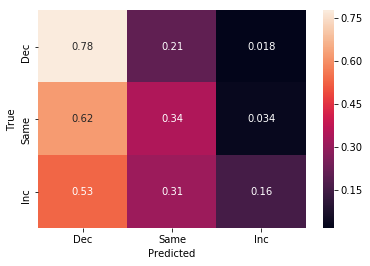

In [37]:
def get_predictions(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
  cm = tf.confusion_matrix(test["new_label"],
                           get_predictions(estimator, predict_test_input_fn))
  with tf.Session() as session:
    cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(
    cm_out,
    annot=True,
    xticklabels=['Dec','Same','Inc'],
    yticklabels=['Dec','Same','Inc'])
plt.xlabel("Predicted")
plt.ylabel("True")

In [38]:
predicted=get_predictions(estimator, predict_test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpjh0lo8e8\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [39]:
final_table=pd.DataFrame()

In [40]:
final_table = pd.DataFrame({'text':test['text'],'actual':test['new_label'],'predicted': predicted})

In [41]:
final_table

,text,actual,predicted
2402,failing calling wrong two years got caught big...,1,0
905,calling president egypt short discuss tragic t...,0,0
2777,joint statement former presidential candidates...,2,0
1564,watching hurricane closely team done good job ...,0,0
925,nfl thinking new idea keeping teams locker roo...,0,0
1320,thank,0,0
1683,homeland security law enforcement alert closel...,0,1
385,honor welcome bipartisan members congress disc...,1,0
898,last thing need alabama u senate schumer pelos...,0,0
778,last night election proved anything proved nee...,0,1


In [1]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [2]:
gdef = tf.GraphDef()
from google.protobuf import text_format
text_format.Merge(open("./output/graph.pbtxt").read(), gdef)
show_graph(gdef)

NameError: name 'tf' is not defined